**Kullanacağımız bisiklet verileri gerçek değildir, bu verileri gerçekmiş gibi kullanacağız.**

In [1]:
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt

In [2]:
dataFrame = pd.read_excel("veriler/bisiklet_fiyatlari.xlsx")
dataFrame.head()

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430


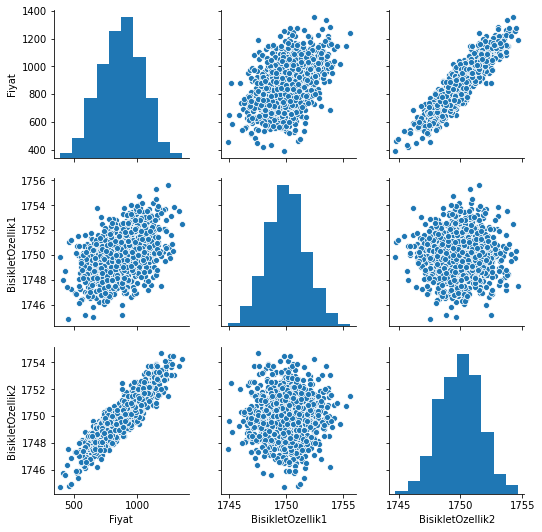

In [3]:
sbn.pairplot(dataFrame) # Verilerimizin farklı farklı karşılaştırma grafikleştirmesini tek bir grafik çerçevesinde görüyoruz.

# Veriyi train-test olarak bölme

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Dizilerimizi oluşturalım:

# y = wx + b
# y -> label
y = dataFrame["Fiyat"].values # Values komutu ile DF olan verimizi numpy dizisine çevirdik.

# x -> feature (Özellik)
x = dataFrame[["BisikletOzellik1","BisikletOzellik2"]].values

# Verilerimizi test-train olarak bölüyoruz
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33, random_state=15)

In [6]:
x_train.shape

(670, 2)

In [7]:
x_test.shape

(330, 2)

In [8]:
y_train.shape

(670,)

In [9]:
y_test.shape

(330,)

# Scaling- Veriyi Normalize Etme

In [10]:
# Scaling kısmını sadece x için uyguluyoruz çünkü o kısım bizim giriş değerlerimiz.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Model Oluşturma 

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential # Sequential, bizim modelimizin aslında sınıfı ve modelimizi bu sınıftan oluşturuyoruz daha sonra içerisinde hangi katmalar ile çalışacağız onu belirtiyoruz.
from tensorflow.keras.layers import Dense # katmanlar ile çalışmak için kullanıyoruz.

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passi

In [12]:
model = Sequential() # Modeli oluşturuyoruz.

# Burada katmanları oluşturuken giriş katmanını kendisi özelliklerimize göre ayarladığı için giriş katmanını belirlemiyoruz.

# 3 adet gizli katman belirliyoruz.
# Dense içine ilk parametre olarak kaç nöron olacağını belirliyoruz, activation ile aktivasyon fonksiyonumuzu belirliyoruz.
model.add(Dense(4, activation="relu"))
model.add(Dense(4, activation="relu")) 
model.add(Dense(4, activation="relu")) 

# Çıktı katmanını da biz belirliyoruz.
model.add(Dense(1))

# Son olarak optimizasyon algoritmasını ve loss algoritmasını yazmamız gerekiyor.
model.compile(optimizer= "rmsprop", loss="mse") # compile fonksiyonu bütün yaptığımız işlemleri birleştiriyor ve çalışmaya hazır hale getiriyor.

Instructions for updating:
Colocations handled automatically by placer.


# Model Eğitme

In [13]:
# batch = veri setimiz çok büyük ise ve biz bu veri setini modelimize yani YSA verirsek modeli çökertebiliriz bunun için veriye göre batc ile sıralı bir şekilde vereceğiz.

# Epoch değerimizi belirliyoruz, burada batch kullanmayacağız.
model.fit(x_train,y_train,epochs=250)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
Epoch 1/250
670/670 [==============================] - 0s 280us/sample - loss: 795222.2183
Epoch 2/250
670/670 [==============================] - 0s 36us/sample - loss: 794904.0715
Epoch 3/250
670/670 [==============================] - 0s 34us/sample - loss: 794598.6235
Epoch 4/250
670/670 [==============================] - 0s 33us/sample - loss: 794272.2993
Epoch 5/250
670/670 [==============================] - 0s 33us/sample - loss: 793915.2875
Epoch 6/250
670/670 [==============================] - 0s 37us/sample - loss: 793527.6668
Epoch 7/250
670/670 [==============================] - 0s 34us/sample - loss: 793104.0847
Epoch 8/250
670/670 [==============================] - 0s 39us/sample - loss: 792648.0674
Epoch 9/250
670/670 [==============================] - 0s 27us/sample - loss: 792155.7410
Epoch 10/250
670/670 [==============================] - 0s 27us/sample - loss: 791624.3474
Ep

670/670 [==============================] - 0s 25us/sample - loss: 930.1762
Epoch 177/250
670/670 [==============================] - 0s 25us/sample - loss: 886.2995
Epoch 178/250
670/670 [==============================] - 0s 25us/sample - loss: 841.9441
Epoch 179/250
670/670 [==============================] - 0s 27us/sample - loss: 804.5584
Epoch 180/250
670/670 [==============================] - 0s 25us/sample - loss: 760.3636
Epoch 181/250
670/670 [==============================] - 0s 28us/sample - loss: 723.9742
Epoch 182/250
670/670 [==============================] - 0s 25us/sample - loss: 684.1093
Epoch 183/250
670/670 [==============================] - 0s 27us/sample - loss: 648.9299
Epoch 184/250
670/670 [==============================] - 0s 27us/sample - loss: 621.7531
Epoch 185/250
670/670 [==============================] - 0s 30us/sample - loss: 589.0370
Epoch 186/250
670/670 [==============================] - 0s 24us/sample - loss: 561.3511
Epoch 187/250
670/670 [============

In [14]:
model.history.history # Burada bize modelimizdeki kayıpları veya kazançları bir sözlük içerisinde veriyor ve biz bu verileri alarak grafik oluşturabiliriz.

{'loss': [795222.2182835821,
  794904.0714552238,
  794598.6235074627,
  794272.2992537314,
  793915.2875,
  793527.6667910448,
  793104.0847014926,
  792648.0673507462,
  792155.7410447762,
  791624.3473880597,
  791052.4858208955,
  790428.6222014925,
  789751.1623134328,
  789011.4121268657,
  788202.4332089552,
  787331.4427238806,
  786376.8951492538,
  785344.9628731343,
  784226.1242537313,
  783007.8985074627,
  781693.7501865672,
  780265.9235074627,
  778724.5546641791,
  777050.8309701493,
  775243.0298507463,
  773304.734141791,
  771227.9134328358,
  768992.3044776119,
  766604.4212686567,
  764035.5748134329,
  761311.1654850746,
  758390.9468283582,
  755287.0888059702,
  752005.1406716418,
  748528.5367537313,
  744819.3858208955,
  740889.6712686567,
  736749.9115671642,
  732387.2815298508,
  727792.7253731344,
  722922.9190298507,
  717815.0932835821,
  712448.6162313432,
  706800.9682835821,
  700906.3972014926,
  694730.5593283582,
  688250.868097015,
  681452.0936

In [15]:
loss = model.history.history["loss"]

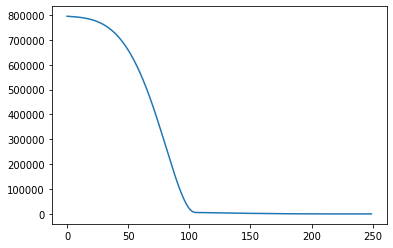

In [16]:
sbn.lineplot(x=range(len(loss)), y= loss)

**Modelimizi eğittik ama modelimizin bir de test verileri var ve bu test verilerine karşı birkaç değerlendirme yapmamız gerekiyor. Burada yapabileceğimiz değerlendirmelerden bir tanesi modelin kendi değerlendirmesi:**

In [17]:
trainLoss = model.evaluate(x_train,y_train,verbose=0) # bu değerlendirme ile fonksiyonda ne kadar kayıp yaşıyoruz onu veriyor bize
trainLoss

73.33739889344173

**Biz burada hem test hem de train değerlerimiz için bu işlemi yaparsak ve bu işlemler birbirine yakın çıkarsa demek oluyorki yanlış bir işlem yapmıyoruz çünkü loss değerleri neredeyse aynı olması lazım.**

In [18]:
testLoss = model.evaluate(x_test,y_test,verbose=0)
testLoss

75.0574712117513

**Birbirlerine yakınlığına bakıyoruz ve birbirine yakın gibi gözüküyor fakat tam olarak çok emin değiliz ve emin olmak için bazı tahminler yapalım ve bu tahminleri kıyaslayalım.**

# Model'de Tahmin ve Değerlendirme
**Modelimizde train verisini kullandık fakat test verisini kullanmadık ve bu veriyi tahmin olarak kullanabiliriz. x_test'in geçek verileri y_test olduğu için tahmin yapıp bunları karşılaştırabiliriz.**

In [19]:
testTahminleri = model.predict(x_test) # modelimize göre tahmin yapıyoruz ve bize
testTahminleri # tahmini bisikletlerin satış fiyatlarını veriyor.

array([[1078.1439 ],
       [ 624.24774],
       [ 876.4574 ],
       [ 894.8231 ],
       [ 900.125  ],
       [ 452.40414],
       [ 931.56433],
       [ 991.8855 ],
       [ 941.3915 ],
       [1017.162  ],
       [ 751.30945],
       [ 918.08875],
       [ 948.05096],
       [1055.0137 ],
       [1121.604  ],
       [ 682.0857 ],
       [1127.5042 ],
       [ 651.65454],
       [1155.1566 ],
       [ 886.8964 ],
       [ 893.2226 ],
       [ 717.05426],
       [ 457.16766],
       [ 612.7404 ],
       [ 835.31165],
       [1091.4603 ],
       [ 714.29126],
       [ 757.39795],
       [ 874.00555],
       [ 771.1144 ],
       [ 451.91492],
       [ 783.3861 ],
       [ 728.75806],
       [ 647.3909 ],
       [ 887.185  ],
       [ 844.2516 ],
       [1036.0532 ],
       [1023.32996],
       [ 845.27673],
       [ 862.70917],
       [ 757.5508 ],
       [1175.0447 ],
       [1097.962  ],
       [1088.1378 ],
       [ 873.3511 ],
       [ 597.089  ],
       [1146.3508 ],
       [ 973.

**Şimdi gerçek fiyatlar(y_test) ile tahmin verilerimizi karşılaştıralım:**

In [20]:
tahminDf = pd.DataFrame(y_test,columns=["Gerçek Y"])
tahminDf

,Gerçek Y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [21]:
testTahminleri = pd.Series(testTahminleri.reshape(330,))

In [22]:
tahminDf = pd.concat([tahminDf,testTahminleri], axis=1)
tahminDf.columns = ["Gerçek Y", "Tahmin Y"]
tahminDf

,Gerçek Y,Tahmin Y
0,1081.652164,1078.143921
1,622.675990,624.247742
2,889.356810,876.457397
3,902.826733,894.823120
4,897.662404,900.125000
...,...,...
325,1028.438035,1013.873596
326,789.934950,791.383667
327,758.490486,766.307373
328,1172.871659,1167.851562


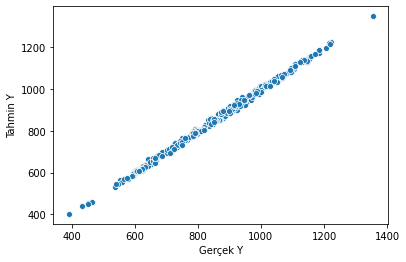

In [23]:
sbn.scatterplot(x = "Gerçek Y", y = "Tahmin Y", data=tahminDf)

* **Grafiğe bakarsak bire bir örtüşüyor gibi duruyor.**
* **sklearn kütüphanesi yardımı ile gerçek hata değerimiz ne kadar onu görebiliriz:**

In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [25]:
mean_absolute_error(tahminDf["Gerçek Y"], tahminDf["Tahmin Y"]) # Ortalama sapma değeri olarak düşünebiliriz.

6.934773681220406

In [26]:
mean_squared_error(tahminDf["Gerçek Y"], tahminDf["Tahmin Y"])

75.05748103973374

In [28]:
dataFrame.describe()

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115766,1751.129414
max,1355.213745,1755.613884,1754.666038


**Bu değerlere bakarak şunu söyleyebiliriz, ortalama fiyatımız 872.67 ve biz ortalama absolute değerine bakarsak şöyle diyebiliriz; 872.67 TL'den 6.93 TL sapması çok önemli değil. Tabiki bu sapmalar yaptığımız işe göre değişir ve biz de modelimizi ona göre daha optimize bir hale getirmeye çalışırız.**

> **Yeni bir veri verdiğimizde ne oluyor ona bakalım:**

In [39]:
# Yeni bir bisiklet girdiğimizde nasıl bir tahmin verecek ona bakalım:

yeniBisikletOzellikleri = [[1753,1751]]

In [40]:
# Yeni gelen bisiklet verisini scale etmemiz lazım:

yeniBisikletOzellikleri = scaler.transform(yeniBisikletOzellikleri)

In [41]:
# Tahmin edelim:
model.predict(yeniBisikletOzellikleri)

array([[1083.3137]], dtype=float32)

> **Bu kadar model yapıyoruz, bu modelleri nasıl bir yere kaydederiz ve geri oradan nasıl çağırırız ona bakalım:**

In [42]:
from tensorflow.keras.models import load_model

In [43]:
model.save("veriler/bisiklet_modeli.h5") # Modeli istediğimiz yere .h5 formatında kaydedebiliyoruz.

In [44]:
# Modeli sonradan çağırabiliyoruz:

sonradanCagirilanModel = load_model("veriler/bisiklet_modeli.h5")

In [45]:
sonradanCagirilanModel.predict(yeniBisikletOzellikleri) # modelimizi hemen test edelim

array([[1083.3137]], dtype=float32)

**ve gördüğümüz gibi modelimizde herhangi bir değişiklik olmadı ve modelimiz çalışıyor**